<h1>App Rating Prediction<h1>

<b>Objective<b>: 

Make a model to predict the app rating, with other information about the app provided.

<b>Problem Statement<b>:

Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.

Domain:    General

<b>Analysis to be done: 

The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, is always a great indicator of the goodness of the app. The problem reduces to: predict which apps will have high ratings.

Content:    Dataset: Google Play Store data (“googleplaystore.csv”)

<b>Fields in the data<b> –

App: Application name

Category: Category to which the app belongs 

Rating: Overall user rating of the app

Reviews: Number of user reviews for the app

Size: Size of the app

Installs: Number of user downloads/installs for the app

Type: Paid or Free

Price: Price of the app

Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult

Genres: An app can belong to multiple genres (apart from its main category). For example, a musical family game will belong to Music, Game, Family genres.

Last Updated: Date when the app was last updated on Play Store

Current Ver: Current version of the app available on Play Store

Android Ver: Minimum required Android version

#### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load the data file

In [2]:
dataset = pd.read_csv("googleplaystore.csv")

In [3]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
dataset.shape

(10841, 13)

#### Drop duplicate rows

In [5]:
dataset.drop_duplicates(inplace = True)

In [6]:
dataset.shape

(10358, 13)

In [7]:
dataset.drop_duplicates(subset = 'App', inplace = True)

In [8]:
dataset.shape

(9660, 13)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


### Check for null values in the data. Get the number of null values for each column

In [10]:
dataset.isna().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [11]:
dataset.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Drop records with nulls in any of the columns

In [12]:
dataset.dropna(inplace = True)

In [13]:
dataset.shape

(8190, 13)

In [14]:
dataset.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Fixing the variables that have incorrect type and inconsistent formatting

#### Size column has sizes in Kb as well as Mb. Convert these to numeric.
1. Extract the numeric value from the column
2. Multiply the value by 1,000, if size is mentioned in Mb

In [15]:
dataset['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 8190, dtype: object

In [16]:
dataset['Size'].value_counts()

Varies with device    1169
14M                    148
12M                    146
11M                    143
13M                    143
                      ... 
251k                     1
647k                     1
121k                     1
930k                     1
920k                     1
Name: Size, Length: 413, dtype: int64

In [17]:
dataset['Size'] = dataset['Size'].str.replace('+','')
dataset['Size'] = dataset['Size'].str.replace('k','')

In [18]:
y=[]
for m in dataset['Size']:
    if 'M' in m:
        x = float(m[:m.index('M')])*1000
    elif m == 'Varies with device':
        x = None
    else:
        x = m
    y.append(x)
    
dataset.Size = y
dataset.Size = dataset.Size.astype(float)

In [19]:
dataset.isna().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1169
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [20]:
dataset.Size.fillna(method='pad',inplace=True)
dataset.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [21]:
dataset.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [22]:
dataset['Reviews'] = dataset['Reviews'].astype(int)

In [23]:
dataset.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Installs field is currently stored as string and has values like 1,000,000+. 
1. Treat 1,000,000+ as 1,000,000
2. remove ‘+’, ‘,’ from the field, convert it to integer

In [24]:
dataset['Installs'] = dataset['Installs'].str.replace(',','')
dataset['Installs'] = dataset['Installs'].str.replace('+','')

In [25]:
dataset['Installs'] = dataset['Installs'].astype(int)

In [26]:
dataset.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Price field is a string and has \\$ symbol. Remove \\$ sign, and convert it to numeric

In [27]:
dataset['Price'] =  dataset['Price'].str.replace('$','')
dataset['Price'] =  dataset['Price'].astype(float)
dataset.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Sanity Checks

#### Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range

In [28]:
dataset.drop(dataset[(dataset['Rating']<1) | (dataset['Rating']>5)].index, inplace = True)
dataset.reset_index(drop = True, inplace = True)
dataset.shape

(8190, 13)

#### Reviews should not be more than installs as only those who installed can review the app. Drop the records that have reviews > installs

In [29]:
dataset.drop(dataset[dataset['Reviews'] > dataset['Installs']].index, inplace = True)
dataset.reset_index(drop = True, inplace = True)
dataset.shape

(8183, 13)

#### For free apps (type = “Free”), the price should not be >0. Drop any such rows

In [30]:
dataset.drop(dataset[(dataset['Type'] == 'Free') & (dataset['Price'] != 0)].index, inplace = True)
dataset.reset_index(drop = True, inplace = True)
dataset.shape

(8183, 13)

### Univariate Analysis

#### Boxplot for Price

Text(0.5, 1.0, 'Boxplot of price-Both Free and paid')

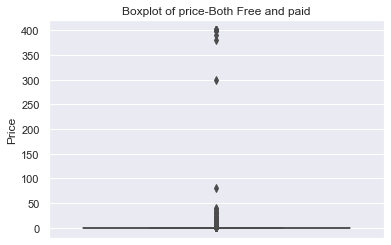

In [31]:
sns.set(style = 'darkgrid')
sns.boxplot(y = dataset['Price']).set_title('Boxplot of price-Both Free and paid')
#plt.savefig('Boxplot_price.png') #---> To save the plot

Text(0.5, 1.0, 'Boxplot of price-Paid apps')

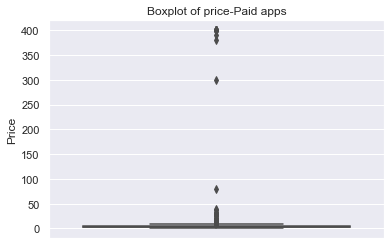

In [32]:
#The no of free apps(price = 0) is very high. They are skewing the boxplot. Hence drop them for the boxplot
df1 = dataset.drop(dataset[dataset['Price'] == 0].index)
sns.boxplot(y = df1['Price']).set_title('Boxplot of price-Paid apps')
#plt.savefig('Boxplot_price(Only paid apps).png') #---> To save the plot

Inference: From the boxplot, it is clear that price > 50 can be considered outliers

#### Boxplot for Reviews

In [33]:
dataset['Reviews'].describe()

count    8.183000e+03
mean     2.556527e+05
std      1.987145e+06
min      1.000000e+00
25%      1.270000e+02
50%      3.017000e+03
75%      4.399350e+04
max      7.815831e+07
Name: Reviews, dtype: float64

Text(0.5, 1.0, 'Boxplot for Reviews')

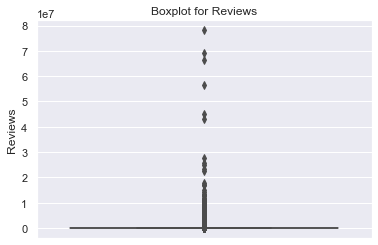

In [34]:
sns.boxplot(y = dataset['Reviews']).set_title('Boxplot for Reviews')
#plt.savefig('Boxplot_Reviews.png')   #---> To save the plot

Inference : Records with reviews > 2 Million can be considered as outliers

#### Boxplot for Installs

Text(0.5, 1.0, 'Boxplot of Installs')

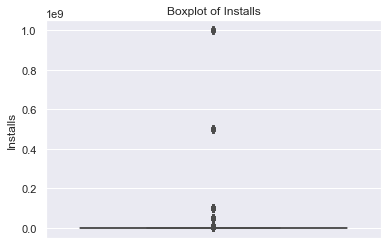

In [35]:
sns.boxplot(y = dataset['Installs']).set_title('Boxplot of Installs')
#plt.savefig('Boxplot_Installs.png')     #---> To save the plot

In [36]:
print('10th percentile is {}'.format(dataset['Installs'].quantile(0.1)) )   #10th percentile
print('25th percentile is {}'.format(dataset['Installs'].quantile(0.25)) )  #25th percentile
print('50th percentile is {}'.format(dataset['Installs'].quantile(0.5)) )   #50th percentile
print('70th percentile is {}'.format(dataset['Installs'].quantile(0.7)) )   #70th percentile
print('90th percentile is {}'.format(dataset['Installs'].quantile(0.9)) )   #90th percentile
print('95th percentile is {}'.format(dataset['Installs'].quantile(0.95)) )  #95th percentile
print('99th percentile is {}'.format(dataset['Installs'].quantile(0.99)) )  #99th percentile
print('99.5th percentile is {}'.format(dataset['Installs'].quantile(0.995)))  #99.5th percentile

10th percentile is 1000.0
25th percentile is 10000.0
50th percentile is 100000.0
70th percentile is 1000000.0
90th percentile is 10000000.0
95th percentile is 50000000.0
99th percentile is 100000000.0
99.5th percentile is 500000000.0


95th percentile i.e., installs > 50000000 can be considered outliers and can be removed from the analysis

#### Histogram for Size

Text(0.5, 1.0, 'Histogram for Size')

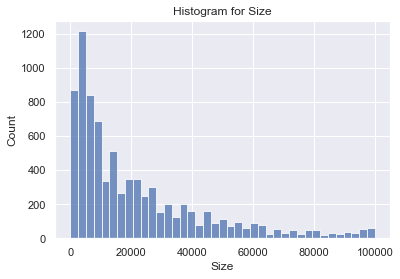

In [37]:
sns.histplot(data = dataset, x='Size').set_title("Histogram for Size")
#plt.savefig('Histogram_Size.png')   #---> To save the plot

Inference: The distribution of size is right skewed. The data has high no of small sized apps

#### Histogram for Rating

Text(0.5, 1.0, 'Histogram for Rating')

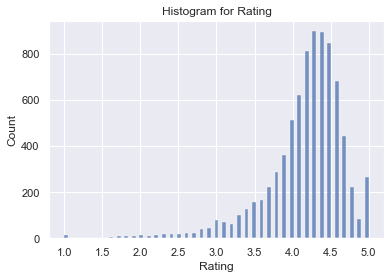

In [38]:
sns.histplot(data = dataset, x='Rating').set_title("Histogram for Rating")
#plt.savefig('Histogram_Rating.png') #---> To save the plot

Inference: The distribution of ratings is left skewed. The no of high rated apps present in the data is more than the low rated apps

### Outlier Treatment

#### Drop records with Price > 50 

In [39]:
dataset[dataset['Price'] > 50]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1673,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
3174,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
3300,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
3304,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
4095,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
4097,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
4098,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
4099,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
4100,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
4101,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up


In [40]:
dataset.drop(dataset[dataset['Price'] > 50].index, inplace = True)
dataset.shape

(8167, 13)

#### Drop records that have Reviews > 2 Million

In [41]:
dataset[dataset['Reviews'] > 2000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
131,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,3100.0,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
286,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,35000.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
287,WhatsApp Messenger,COMMUNICATION,4.4,69119316,35000.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
289,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,17000.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
291,Gmail,COMMUNICATION,4.3,4604324,17000.0,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6390,FIFA Soccer,SPORTS,4.2,3909032,51000.0,100000000,Free,0.0,Everyone,Sports,"July 31, 2018",10.5.00,4.1 and up
6746,DU Battery Saver - Battery Charger & Battery Life,TOOLS,4.5,13479633,14000.0,100000000,Free,0.0,Everyone,Tools,"June 5, 2018",4.8.7.8,4.0 and up
6937,EA SPORTS UFC®,SPORTS,4.5,2371338,37000.0,50000000,Free,0.0,Teen,Sports,"July 24, 2017",1.9.3097721,2.3.3 and up
6939,Need for Speed™ No Limits,GAME,4.4,3344300,22000.0,50000000,Free,0.0,Everyone 10+,Racing,"July 24, 2018",2.12.1,4.1 and up


In [42]:
dataset.drop(dataset[dataset['Reviews'] > 2000000].index, inplace = True)

In [43]:
dataset.shape

(7972, 13)

#### Drop records with installs >= 50000000

In [44]:
dataset.drop(dataset[dataset['Installs'] >= 50000000].index, inplace = True)
dataset.shape

(7725, 13)

In [45]:
dataset.reset_index(drop = True, inplace = True)

### Bivariate Analysis

#### Rating vs Price

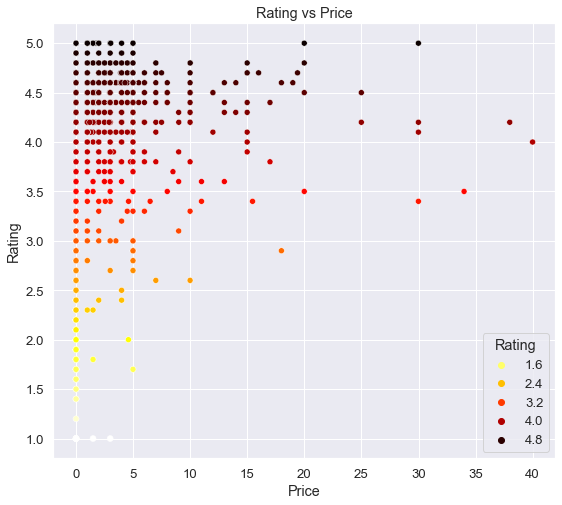

In [46]:
plt.figure(figsize=(9,8))
sns.set_style(style='darkgrid',)
sns.set(font_scale=1.2)
sns.scatterplot(x = dataset['Price'], y = dataset['Rating'],hue=dataset['Rating'], palette = 'hot_r').set_title("Rating vs Price")
#plt.savefig('Rating vs Price.png') #---> To save the plot
plt.show()

Inference : There is no clear pattern. High priced apps have better ratings(though it is not a linear relationship). But no of high priced apps present in the data is very low

#### Rating vs Size

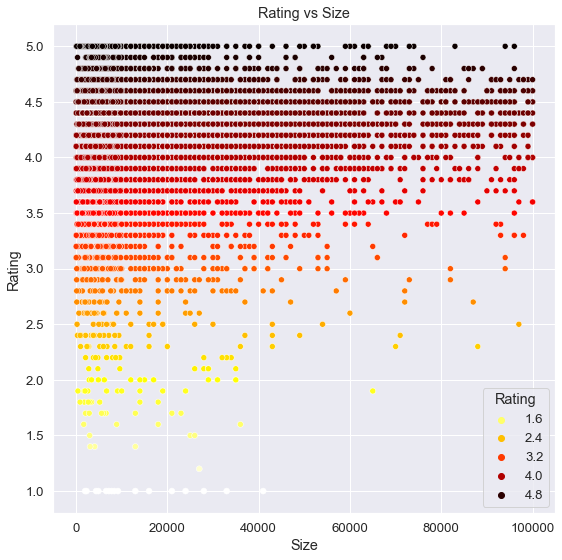

In [47]:
plt.figure(figsize=(9,9))
sns.set_style(style='darkgrid',)
sns.set(font_scale=1.2)
sns.scatterplot(x = dataset['Size'], y = dataset['Rating'],hue=dataset['Rating'], palette = 'hot_r').set_title("Rating vs Size")
#plt.savefig('Rating vs Size.png') #---> To save the plot
plt.show()

Inference : No clear pattern is observed. Heavier apps have better ratings(again the relation is not linear)

#### Rating vs Reviews

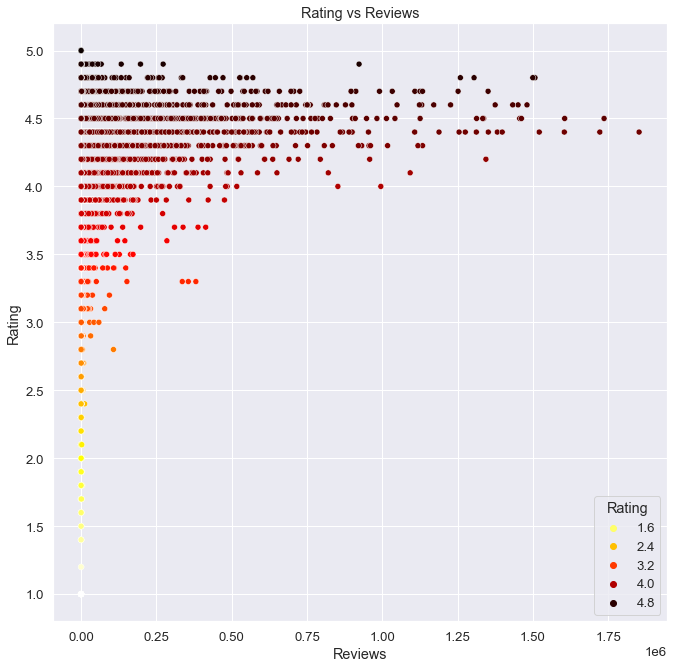

In [48]:
plt.figure(figsize=(11,11))
sns.set_style(style='darkgrid',)
sns.set(font_scale=1.2)
sns.scatterplot(x = dataset['Reviews'], y = dataset['Rating'],hue=dataset['Rating'], palette = 'hot_r').set_title("Rating vs Reviews")
#plt.savefig('Rating vs Reviews.png')    # ----> To save the plot
plt.show()   

Inference: Highly reviewed apps have better ratings. However, there is no clear pattern present

#### Rating vs Content Rating

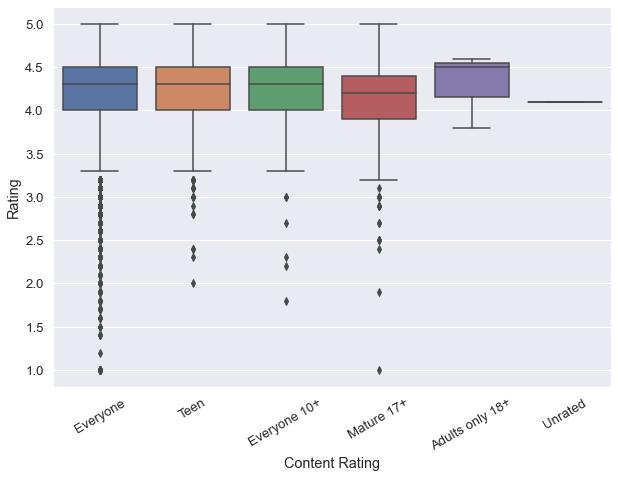

In [49]:
plt.figure(figsize=(10,7))
x = sns.boxplot(x = dataset['Content Rating'], y = dataset['Rating'])
x.set_xticklabels(x.get_xticklabels(), rotation=30)
#plt.savefig('Rating vs Content Rating.png') #-----> To save the plot
plt.show()

Inference: 
1. There is significant overlap in the ratings among all the categories of 'Content Rating'. 
2. 'Adults only 18+' has the highest median value of ratings. But the no of apps present in this category is very less

#### Rating vs Category

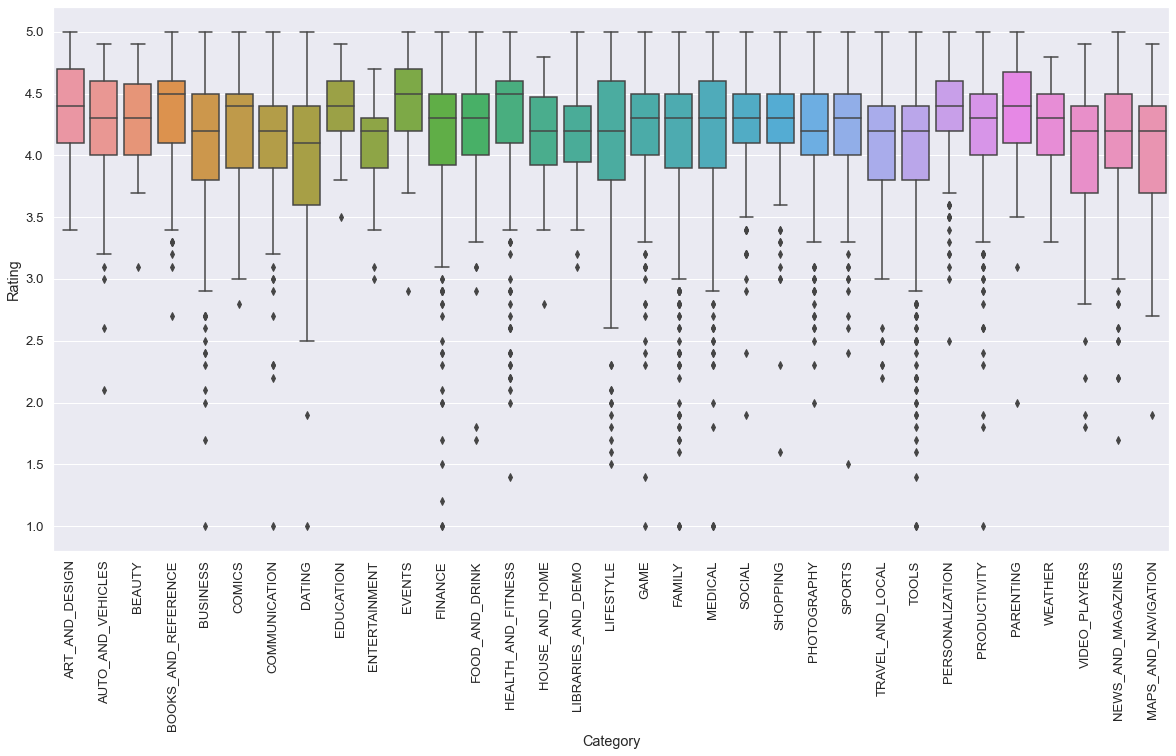

In [50]:
plt.figure(figsize=(20,10))
y = sns.boxplot(x = dataset['Category'], y = dataset['Rating'])
y.set_xticklabels(y.get_xticklabels(), rotation=90)
#plt.savefig('Rating vs Category.png')    # ------> To save the plot
plt.show()

Inference: Most of the categories have similar ratings. Apps in the 'Books and reference', 'Events' categories have the highest medians

### Data preprocessing

Create a copy of the dataframe and name it inp1

In [51]:
inp1 = dataset.copy()

In [52]:
inp1.shape

(7725, 13)

In [53]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [54]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

- Reviews and Install have some values that are still relatively very high.
- Before building a linear regression model,the skew should be reduced. 
- Apply log transformation (np.log1p) to Reviews and Installs.

In [55]:
#Log transformation on reviews
inp1['Reviews'] = np.log1p(inp1['Reviews'])

In [56]:
#Log transformation on Installs
inp1['Installs'] = np.log1p(inp1['Installs'])

Drop columns App, Last Updated, Current Ver, and Android Ver as these variables are not useful for the analysis

In [57]:
inp1.drop(['App','Last Updated', 'Current Ver', 'Android Ver'], axis = 1, inplace = True)

In [58]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity
4,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design


In [59]:
inp1.shape

(7725, 9)

Get dummy columns for Category, Genres, and Content Rating in a dataframe named inp2

In [60]:
inp2 = pd.get_dummies(inp1,drop_first=True)

In [61]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,9.210440,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.3,6.875232,2800.0,11.512935,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.4,5.123964,5600.0,10.819798,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 70 - 30 Train test split

In [62]:
X = inp2.iloc[:, 1:] # Predictor variables
y = inp2.iloc[:, 0]  # Target Variable

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 63)

In [64]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((5407, 155), (2318, 155), (5407,), (2318,))

In [65]:
df_train = pd.concat([X_train, y_train], axis = 1) # Train dataframe
df_test = pd.concat([X_test, y_test], axis = 1)    # Test dataframe

## Model Building

In [66]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()  #Creating the linear regression object

In [67]:
#Training the model
lr.fit(X_train, y_train)

LinearRegression()

### R square value for train data

In [68]:
r2_train = lr.score(X_train, y_train)

In [69]:
print("R square of train data = {}".format(r2_train))

R square of train data = 0.14892699986877223


#### Predicting the test set results

In [70]:
y_pred = lr.predict(X_test)

In [71]:
y_pred

array([4.31718167, 3.86385464, 4.46009653, ..., 4.2187353 , 4.67042087,
       3.87563736])

### R square value for test data

In [72]:
r2_test = lr.score(X_test, y_test)

In [73]:
print("R square of test data = {}".format(r2_test))

R square of test data = 0.1501633930074462


### RMSE[Root Mean squared Error]

In [74]:
from sklearn.metrics import mean_squared_error as ms
RMSE = np.sqrt(ms(y_test,y_pred))

### Residual plot

In [75]:
y_test=np.array(y_test)
y_pred=np.array(y_pred)

results=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()});

In [76]:
results['diff'] = results['Predicted'] - results['Actual']

In [77]:
results

,Actual,Predicted,diff
0,4.3,4.317182,0.017182
1,3.5,3.863855,0.363855
2,5.0,4.460097,-0.539903
3,4.1,4.313458,0.213458
4,4.6,3.828671,-0.771329
...,...,...,...
2313,3.7,4.030968,0.330968
2314,3.8,4.047495,0.247495
2315,4.5,4.218735,-0.281265
2316,5.0,4.670421,-0.329579


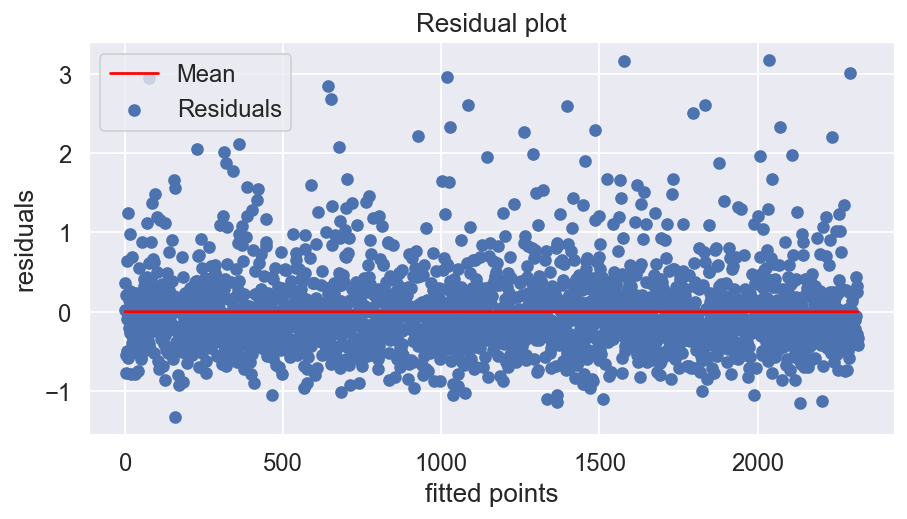

In [78]:
plt.figure(figsize=(8, 4), dpi=130, facecolor='w', edgecolor='b')
f = range(0,len(y_test))
k = [0 for i in range(0,len(y_test))]
plt.scatter(f, y= results['diff'], label = 'Residuals')
plt.plot(f, k , color = 'red', label = 'Mean' )
plt.xlabel('fitted points')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()
#plt.savefig('Residual plot - Test data.png') #---->To save the plot

#### OLS Summary

In [79]:
from statsmodels.api import OLS
olsResults = OLS( y_train,X_train).fit()
olsResults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              3052.
Date:                Sat, 03 Apr 2021   Prob (F-statistic):                        0.00
Time:                        18:30:14   Log-Likelihood:                         -3914.3
No. Observations:                5407   AIC:                                      8071.
Df Residuals:                    5286   BIC:                                      8869.
Df Model:                         121                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Reviews                                          0.1682      0.007     24.249      0.000       0.155       0.182
Size                                          1.179e-07   3.78e-07      0.312      0.755   -6.22e-07    8.58e-07
Installs                                        -0.1467      0.007    -21.108      0.000      -0.160      -0.133
Price                                           -0.0069      0.005     -1.354      0.176      -0.017       0.003
Category_AUTO_AND_VEHICLES                       1.2210      0.198      6.174      0.000       0.833       1.609
Category_BEAUTY                                  1.3080      0.200      6.529      0.000       0.915       1.701
Category_BOOKS_AND_REFERENCE                     1.3032      0.195      6.675      0.000       0.920       1.686
Category_BUSINESS                                1.1990      0.195      6.161      0.000       0.817       1.581
Category_COMICS                                  1.8583      0.307      6.059      0.000       1.257       2.460
Category_COMMUNICATION                           1.1625      0.195      5.966      0.000       0.781       1.544
Category_DATING                                  1.1262      0.196      5.748      0.000       0.742       1.510
Category_EDUCATION                               2.0999      0.394      5.327      0.000       1.327       2.873
Category_ENTERTAINMENT                           2.1382      0.395      5.409      0.000       1.363       2.913
Category_EVENTS                                  1.3738      0.199      6.920      0.000       0.985       1.763
Category_FAMILY                                  2.1427      0.388      5.516      0.000       1.381       2.904
Category_FINANCE                                 1.1756      0.195      6.044      0.000       0.794       1.557
Category_FOOD_AND_DRINK                          1.2066      0.196      6.150      0.000       0.822       1.591
Category_GAME                                    2.3677      0.388      6.105      0.000       1.607       3.128
Category_HEALTH_AND_FITNESS                      1.2123      0.195      6.225      0.000       0.831       1.594
Category_HOUSE_AND_HOME                          1.2376      0.198      6.263      0.000       0.850       1.625
Category_LIBRARIES_AND_DEMO                      1.2512      0.197      6.342      0.000       0.864       1.638
Category_LIFESTYLE                               1.5333      0.309      4.964      0.000       0.928       2.139
Category_MAPS_AND_NAVIGATION                     1.1419      0.196      5.836      0.000       0.758       1.525
Category_MEDICAL                              

## Results

In [80]:
print("R square of train data = ",r2_train)
print("R square of test data = ",r2_test)
print('Root Mean Squared Error=',RMSE)

R square of train data =  0.14892699986877223
R square of test data =  0.1501633930074462
Root Mean Squared Error= 0.5212886428029441


### Exporting the datasets

In [81]:
#inp1.to_csv('inp1.csv', index = False)
#inp2.to_csv('inp2.csv', index = False)
#df_train.to_csv('df_train.csv', index = False)
#df_test.to_csv('df_test.csv', index = False)
#results.to_csv('Predicted Results.csv', index = False)